# Graph Analysis on sample data

<p>For more details about the Gower distance:
<a href="http://venus.unive.it/romanaz/modstat_ba/gowdis.pdf">Gower, J.C., 1971, A General Coefficient of Similarity and Some of Its Properties</a>.</p>

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (10, 7)

In [3]:
import numpy as np
import pandas as pd
import sys
import Gower as gow
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import networkx as nx
import GraphConstruct as gc 
import GraphProcess as gp
import scipy as sc
from sklearn.preprocessing import minmax_scale

In [4]:
from Utilities import Utilities as utils

## Import data

In [5]:
util = utils()
filename = "./sample.csv"
response = "ExecTime"
X, y = util.load_data(filename, response)
print X.shape, y.shape 

(17815, 6) (17815, 1)


In [6]:
data_pd = util.data_norm(X, y, feats_drop=None, response_name='ExecTime', response_norm=False)
data_pd.head()

,Ranks,Nesting,Dset,Gset,OMP,PKG_LIMIT,ExecTime
0,0.0833333,DGZ,0.25,0.03125,0.333333,0.5,7.6394
1,0.0833333,DGZ,0.25,0.03125,0.333333,0.55,6.0149
2,0.0833333,DGZ,0.25,0.03125,0.333333,0.6,5.4116
3,0.0833333,DGZ,0.25,0.03125,0.333333,0.65,4.8056
4,0.0833333,DGZ,0.25,0.03125,0.333333,0.7,4.6053


In [7]:
data_pd.dtypes # Datatypes of the features

Ranks         object
Nesting       object
Dset          object
Gset          object
OMP           object
PKG_LIMIT     object
ExecTime     float64
dtype: object

In [8]:
# Convert datatypes of a few features to float 
data_new = util.convert_pd_dtype(data_pd, ['PKG_LIMIT', 'OMP', 'Ranks', 'ExecTime'], totype='float64')

In [9]:
# Verify conversion and check shape of the dataframe
print data_new.dtypes
print data_new.shape
data_new.head()

Ranks        float64
Nesting       object
Dset          object
Gset          object
OMP          float64
PKG_LIMIT    float64
ExecTime     float64
dtype: object
(17815, 7)


,Ranks,Nesting,Dset,Gset,OMP,PKG_LIMIT,ExecTime
0,0.083333,DGZ,0.25,0.03125,0.333333,0.50,7.6394
1,0.083333,DGZ,0.25,0.03125,0.333333,0.55,6.0149
2,0.083333,DGZ,0.25,0.03125,0.333333,0.60,5.4116
3,0.083333,DGZ,0.25,0.03125,0.333333,0.65,4.8056
4,0.083333,DGZ,0.25,0.03125,0.333333,0.70,4.6053


## Graph Analysis

In [10]:
# Create a GraphProcess object to call relevant functions
gp_obj = gp.GraphProcess()

Initalized object


### Using Gower distance

Data sample shape: (1782, 7)
Computing feature sensitivities for features:
0 1 2 3 4 5 

Plotting feature sensitivity - In the order of decreasing feature importance:


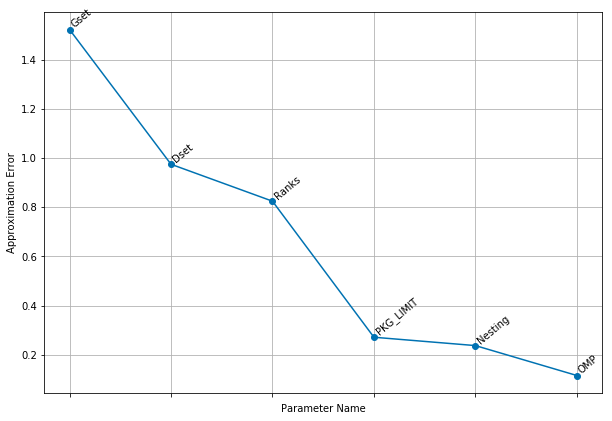



Computing and Plotting the Fourier Spectrum


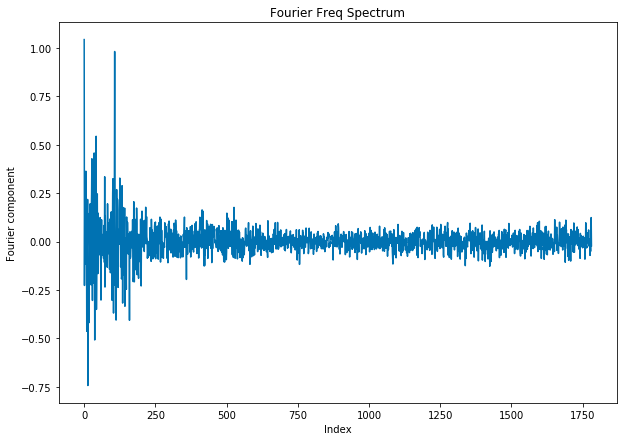


Time elapsed =  109.03788209 seconds


In [11]:
start = timer()
n_feat = data_new.shape[1]-1

data_sample, spectral_error, xf, U = gp_obj.graph_analysis(data_new.iloc[:, :n_feat], 
                                                           data_new.iloc[:, n_feat], 
                                                    k_neighb=10, sample_frac=0.1, freq = 50, distance='Gower',\
                                                    drop_together = None, noise=0.01)
end = timer()
print "\nTime elapsed = ", (end-start), "seconds"